In [1]:
import numpy as np  # numpy<2.0 for compatibility with fasttext
import pandas as pd
twitter_df = pd.read_csv("twitter_human_bots_dataset.csv", index_col=0)

In [2]:
twitter_df.head()

created_at  default_profile  default_profile_image  \
0  2016-10-15 21:32:11            False                  False   
1  2016-11-09 05:01:30            False                  False   
2  2017-06-17 05:34:27            False                  False   
3  2016-07-21 13:32:25             True                  False   
4  2012-01-15 16:32:35            False                  False   

                                         description  favourites_count  \
0  Blame @xaiax, Inspired by @MakingInvisible, us...                 4   
1  Photographing the American West since 1980. I ...               536   
2  Scruffy looking nerf herder and @twitch broadc...              3307   
3  Wife.Godmother.Friend.Feline Fanatic! Assistan...              8433   
4               Loan coach at @mancity & Aspiring DJ                88   

   followers_count  friends_count  geo_enabled                  id lang  \
0             1589              4        False  787405734442958848   en   
1              860            880        False  796216118331310080   en   
2              172            594         True  875949740503859204   en   
3              517            633         True  756119643622735875   en   
4           753678            116         True           464781334   en   

                  location                      profile_background_image_url  \
0                  unknown  http://abs.twimg.com/images/themes/theme1/bg.png   
1           Estados Unidos  http://abs.twimg.com/images/themes/theme1/bg.png   
2          Los Angeles, CA  http://abs.twimg.com/images/themes/theme1/bg.png   
3           Birmingham, AL                                               NaN   
4  England, United Kingdom  http://abs.twimg.com/images/themes/theme1/bg.png   

                                   profile_image_url      screen_name  \
0  http://pbs.twimg.com/profile_images/7874121826...  best_in_dumbest   
1  http://pbs.twimg.com/profile_images/8023296328...     CJRubinPhoto   
2  http://pbs.twimg.com/profile_images/1278890453...         SVGEGENT   
3  http://pbs.twimg.com/profile_images/1284884924...    TinkerVHELPK5   
4  http://pbs.twimg.com/profile_images/9952566258...    JoleonLescott   

   statuses_count  verified  average_tweets_per_day  account_age_days  \
0           11041     False                   7.870              1403   
1             252     False                   0.183              1379   
2            1001     False                   0.864              1159   
3            1324     False                   0.889              1489   
4            4202      True                   1.339              3138   

  account_type  
0          bot  
1        human  
2        human  
3        human  
4        human

In [3]:
twitter_df["created_at"] = pd.to_datetime(twitter_df["created_at"], errors="coerce")

## Initial Overview
- data types of each column
- missing values
- unique values and their counts
- summary statistics for columns with int/float values

In [4]:
def column_summary(df):
    summary_data = []

    for col in df.columns:
        col_dtype = df[col].dtype
        num_of_nulls = df[col].isnull().sum()
        num_of_non_nulls = df[col].notnull().sum()
        num_of_distinct_values = df[col].nunique()
        
        if num_of_distinct_values <= 2:
            distinct_values_counts = df[col].value_counts().to_dict()
        else:
            top_10_values_counts = df[col].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        row = {
                'col_name': col,
                'col_dtype': col_dtype,
                'num_of_nulls': num_of_nulls,
                'num_of_non_nulls': num_of_non_nulls,
                'num_of_distinct_values': num_of_distinct_values,
                'distinct_values_counts': distinct_values_counts,
                'mean': np.nan,
                'std': np.nan,
                'min': np.nan,
                '25%': np.nan,
                '50%': np.nan,
                '75%': np.nan,
                'max': np.nan
        }
    
        group_statistics = df.describe()

        if col in group_statistics.columns:
            row["mean"] = group_statistics.loc["mean", col]
            row["std"] = group_statistics.loc["std", col]
            row["min"] = group_statistics.loc["min", col]
            row["25%"] = group_statistics.loc["25%", col]
            row["50%"] = group_statistics.loc["50%", col]
            row["75%"] = group_statistics.loc["75%", col]
            row["max"] = group_statistics.loc["max", col]
        
        summary_data.append(row)
    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [5]:
summary_df = column_summary(twitter_df)
summary_df

col_name       col_dtype  num_of_nulls  \
0                     created_at  datetime64[ns]             0   
1                default_profile            bool             0   
2          default_profile_image            bool             0   
3                    description          object          7257   
4               favourites_count           int64             0   
5                followers_count           int64             0   
6                  friends_count           int64             0   
7                    geo_enabled            bool             0   
8                             id           int64             0   
9                           lang          object          7957   
10                      location          object             4   
11  profile_background_image_url          object          4499   
12             profile_image_url          object             1   
13                   screen_name          object             0   
14                statuses_count           int64             0   
15                      verified            bool             0   
16        average_tweets_per_day         float64             0   
17              account_age_days           int64             0   
18                  account_type          object             0   

    num_of_non_nulls  num_of_distinct_values  \
0              37438                   37430   
1              37438                       2   
2              37438                       2   
3              30181                   29944   
4              37438                   15004   
5              37438                   13210   
6              37438                    5301   
7              37438                       2   
8              37438                   37438   
9              29481                      48   
10             37434                   12049   
11             32939                      20   
12             37437                   36880   
13             37438                   37438   
14             37438                   19189   
15             37438                       2   
16             37438                   12636   
17             37438                    4156   
18             37438                       2   

                               distinct_values_counts  \
0   {2016-09-03 20:06:04: 2, 2012-11-21 02:56:00: ...   
1                         {False: 21718, True: 15720}   
2                           {False: 36880, True: 558}   
3   {'.': 14, 'Actor': 13, '#BlackLivesMatter': 11...   
4   {0: 850, 1: 245, 2: 169, 3: 118, 5: 112, 4: 10...   
5   {0: 1255, 1: 676, 2: 470, 3: 392, 4: 382, 7: 3...   
6   {0: 6410, 1: 290, 2: 189, 3: 115, 4: 98, 5: 96...   
7                         {False: 20361, True: 17077}   
8   {787405734442958848: 1, 25865004: 1, 377662109...   
9   {'en': 21450, 'es': 1213, 'pt': 704, 'it': 637...   
10  {'unknown': 13023, 'Los Angeles, CA': 524, 'Ne...   
11  {'http://abs.twimg.com/images/themes/theme1/bg...   
12  {'http://abs.twimg.com/sticky/default_profile_...   
13  {'best_in_dumbest': 1, 'AStetka': 1, 'barbarwe...   
14  {1332: 67, 0: 56, 346: 48, 1: 44, 2: 39, 8: 38...   
15                         {False: 29887, True: 7551}   
16  {0.002: 88, 0.011: 82, 0.01: 81, 0.004: 81, 0....   
17  {1155: 253, 1445: 247, 1444: 180, 1118: 126, 2...   
18                     {'human': 25013, 'bot': 12425}   

                             mean           std                  min  \
0   2012-05-10 19:06:11.558710528           NaN  2006-07-05 19:52:46   
1                             NaN           NaN                  NaN   
2                             NaN           NaN                  NaN   
3                             NaN           NaN                  NaN   
4                    12302.062183  3.392365e+04                  0.0   
5                   370309.830279  2.470829e+06                  0.0   
6                     4445.925183  4.954520e+04                  0.0   
7                        

## Data Cleaning Checks
- duplicates
- outliers (through visualisation)

Duplicates: 0


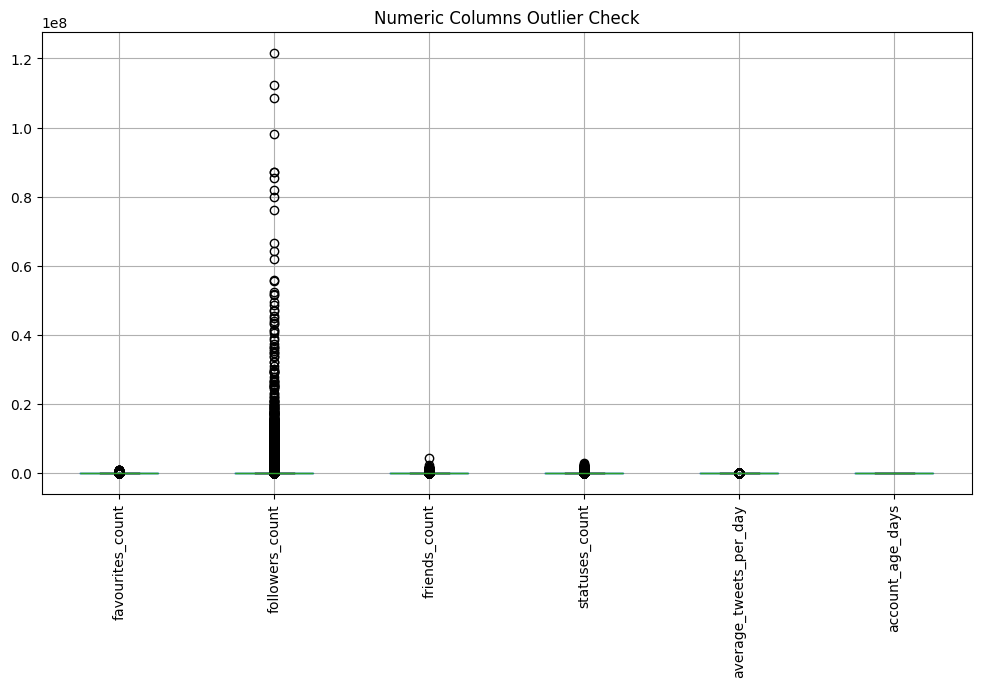

In [6]:
import matplotlib.pyplot as plt

print(f"Duplicates: {twitter_df.duplicated().sum()}")

# For numeric columns
numeric_cols = ["favourites_count", "followers_count", "friends_count", "statuses_count", "average_tweets_per_day", "account_age_days"]
twitter_df[numeric_cols].boxplot(figsize=(12, 6), rot=90)
plt.title("Numeric Columns Outlier Check")
plt.show()

## Target Variable Exploration

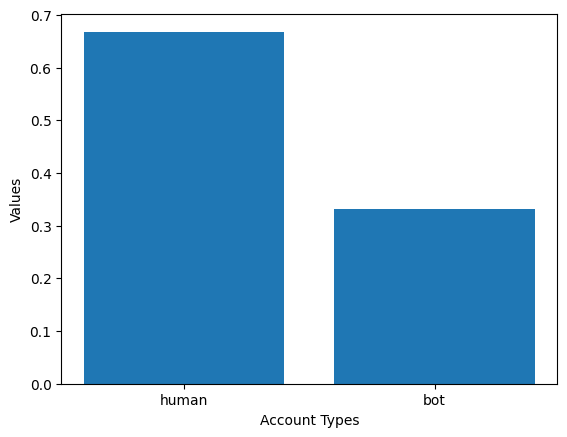

In [7]:
target_counts = twitter_df["account_type"].value_counts(normalize=True)

plt.bar(target_counts.index, target_counts.values)

# Add labels and title
plt.xlabel('Account Types')
plt.ylabel('Values')

# Display the plot
plt.show()

## Bivariate Analysis
- relationships between the target and features

### Hypotheses
1. bot accounts will be relatively newer than genuine accounts as if twitter detects a bot account, it will be deleted quickly
- Distribution of `created_at` and `account_days`, split by `account_type`: distribution for bot will be more left-skewed and right-skewed respectively

2. bot accounts are less likely to be verified
- Significant difference between the proportion of verified accounts, split by `account_type`

3. bots may be unusually active
- Since some bots aim to spread misinformation/propaganda, and inflate popularity, they may have a higher `average_tweets_per_dat`, `favourites_count`

In [8]:
twitter_df.columns

Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type'],
      dtype='object')

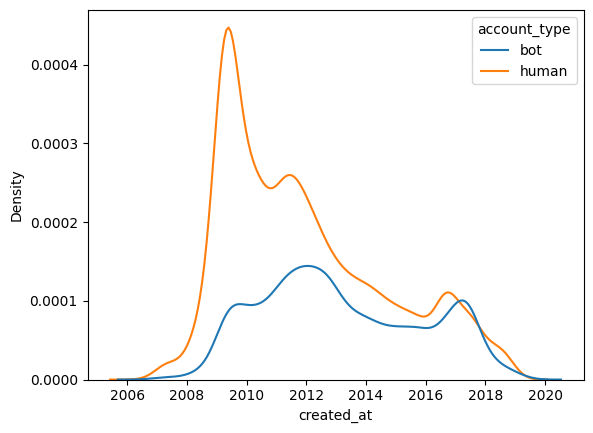

In [9]:
import seaborn as sns

sns.kdeplot(data=twitter_df, x="created_at", hue="account_type")
plt.show()

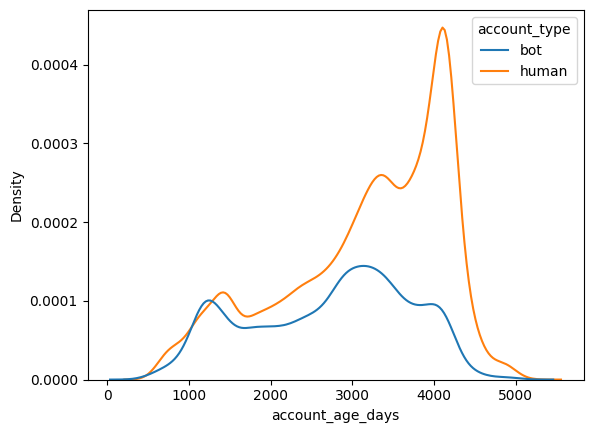

count         mean         std    min     25%     50%     75%  \
account_type                                                                    
bot           12425.0  2717.274930  980.016502  483.0  1900.0  2882.0  3467.0   
human         25013.0  3173.561308  995.928741  606.0  2542.0  3395.0  4032.0   

                 max  
account_type          
bot           5011.0  
human         5158.0

In [10]:
sns.kdeplot(data=twitter_df, x="account_age_days", hue="account_type")
plt.show()

twitter_df.groupby("account_type")["account_age_days"].describe()

verified      False  True 
account_type              
bot           12109    316
human         17778   7235


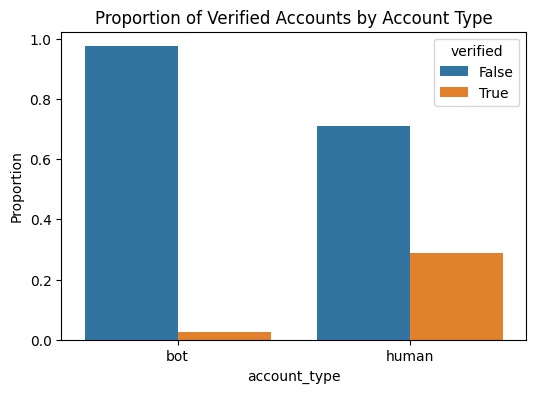

Chi-square test p-value: 0.0000


In [11]:
# Count of verified vs non-verified by account type
verified_counts = pd.crosstab(twitter_df['account_type'], twitter_df['verified'])
print(verified_counts)

# Plot proportions
verified_prop = (
    verified_counts.div(verified_counts.sum(axis=1), axis=0)
    .reset_index()
    .melt(id_vars='account_type', var_name='verified', value_name='proportion')
)

plt.figure(figsize=(6, 4))
sns.barplot(data=verified_prop, x='account_type', y='proportion', hue='verified')
plt.title("Proportion of Verified Accounts by Account Type")
plt.ylabel("Proportion")
plt.show()

# Optional: statistical test (Chi-square)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(verified_counts)
print(f"Chi-square test p-value: {p:.4f}")


Based on the results of the chi-squared test, we have sufficient evidence to conclude that bots have much lower proportion of verified accounts than humans.

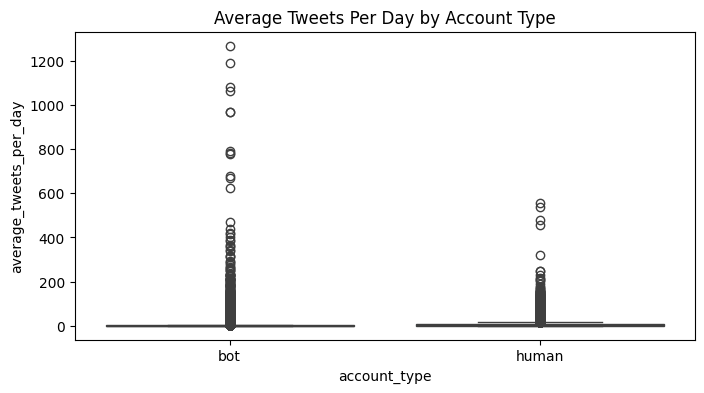

                count      mean        std  min    25%    50%    75%       max
account_type                                                                  
bot           12425.0  7.252241  37.310915  0.0  0.222  0.817  1.949  1269.055
human         25013.0  6.712556  14.585320  0.0  0.715  2.410  6.933   557.927


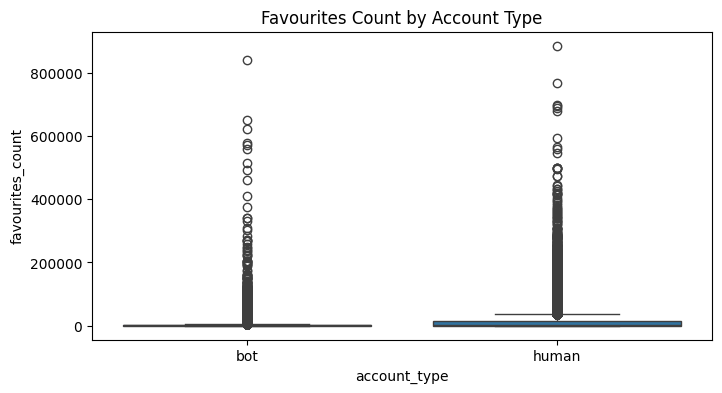

                count          mean           std  min    25%     50%  \
account_type                                                            
bot           12425.0   4483.136740  23913.709073  0.0  140.0  1131.0   
human         25013.0  16186.048455  37322.654404  0.0  649.0  3649.0   

                  75%       max  
account_type                     
bot            2231.0  839929.0  
human         14955.0  885123.0  
average_tweets_per_day: t=1.554, p=0.1201
favourites_count: t=-36.694, p=0.0000


In [12]:
cols_of_interest = ['average_tweets_per_day', 'favourites_count']

for col in cols_of_interest:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=twitter_df, x='account_type', y=col)
    plt.title(f"{col.replace('_', ' ').title()} by Account Type")
    plt.show()
    
    # Optional: descriptive stats
    print(twitter_df.groupby('account_type')[col].describe())

# Optional: compare means (e.g., t-test)
from scipy.stats import ttest_ind

for col in cols_of_interest:
    bot_vals = twitter_df[twitter_df['account_type'] == 'bot'][col].dropna()
    genuine_vals = twitter_df[twitter_df['account_type'] != 'bot'][col].dropna()
    t, p = ttest_ind(bot_vals, genuine_vals, equal_var=False)
    print(f"{col}: t={t:.3f}, p={p:.4f}")


Based on the results of the t-test, there is insufficient evidence to claim that bots and humans differ in `average_tweets_per_day`, but sufficient evidence to claim that mean if `favourite_counts` of bots < mean of `favourite_counts` of humans.

Categorical variables (`lang`, `location`)
- clean up location to see if we can group similar locations
- features to engineer: valid/invalid location
-  in english / other languages, and if its in other languages, is it consistent with `lang`
- group by country

In [13]:
lang_table = pd.crosstab(twitter_df['lang'], twitter_df['account_type'])
lang_table['bot_to_human_ratio'] = lang_table['bot'] / lang_table['human']

total_bot = twitter_df[twitter_df['account_type'] == 'bot'].shape[0]
total_human = twitter_df[twitter_df['account_type'] == 'human'].shape[0]
overall_ratio = total_bot / total_human
print(f"Overall bot-to-human ratio: {overall_ratio:.2f}")

lang_table['ratio_vs_overall'] = lang_table['bot_to_human_ratio'] / overall_ratio

sorted_lang_table = lang_table.sort_values(by="ratio_vs_overall", ascending=False)
sorted_lang_table

Overall bot-to-human ratio: 0.50


account_type   bot  human  bot_to_human_ratio  ratio_vs_overall
lang                                                           
pa               1      0                 inf               inf
zh-cn           72     19            3.789474          7.628660
zh-tw            2      1            2.000000          4.026237
fa               8      4            2.000000          4.026237
sw             120     62            1.935484          3.896359
af             214    119            1.798319          3.620230
ar             378    216            1.750000          3.522958
ko              70     45            1.555556          3.131518
ur               5      4            1.250000          2.516398
el               9      9            1.000000          2.013119
ja             187    191            0.979058          1.970959
cy              64     79            0.810127          1.630881
sl              18     25            0.720000          1.449445
fi              28     44            0.636364          1.281076
so              48     77            0.623377          1.254931
hi               3      5            0.600000          1.207871
th              10     21            0.476190          0.958628
id              97    216            0.449074          0.904039
vi              17     38            0.447368          0.900606
no              52    120            0.433333          0.872351
et              28     67            0.417910          0.841303
pt             206    498            0.413655          0.832736
tr              64    156            0.410256          0.825895
fr             104    271            0.383764          0.772562
it             168    469            0.358209          0.721117
nl              43    122            0.352459          0.709542
hr              13     37            0.351351          0.707312
sk               8     23            0.347826          0.700215
pl              16     46            0.347826          0.700215
bg               5     15            0.333333          0.671040
en            5238  16212            0.323094          0.650427
es             287    926            0.309935          0.623936
da              41    133            0.308271          0.620585
tl              45    147            0.306122          0.616261
de             125    411            0.304136          0.612262
ca              44    154            0.285714          0.575177
sv              24    102            0.235294          0.473675
ro              28    120            0.233333          0.469728
sq               4     19            0.210526          0.423814
cs               2     10            0.200000          0.402624
lv               1      5            0.200000          0.402624
lt               4     24            0.166667          0.335520
ru              27    223            0.121076          0.243741
hu               3     32            0.093750          0.188730
mk               1     15            0.066667          0.134208
ne               0      2            0.000000          0.000000
uk               0     13            0.000000          0.000000
he               0      2            0.000000          0.000000

In [14]:
len(list(twitter_df["location"].unique()))

12050

## EDA on text data
- `description`, `screen_name`

In [15]:
description_df = pd.DataFrame(twitter_df.loc[:, ["description", "account_type"]])

In [16]:
from nltk import tokenize

def safe_word_count(desc):
    if pd.isna(desc) or not isinstance(desc, str):
        return 0
    return len(desc.split())

def safe_mean_word_length(desc):
    if pd.isna(desc) or not isinstance(desc, str):
        return 0
    words = desc.split()
    if len(words) == 0:
        return 0
    return np.mean([len(word) for word in words])

def safe_mean_sent_length(desc):
    if pd.isna(desc) or not isinstance(desc, str):
        return 0
    sents = tokenize.sent_tokenize(desc)
    if len(sents) == 0:
        return 0
    return np.mean([len(sent) for sent in sents])

def count_hashtags(desc):
    if isinstance(desc, str):
        return desc.count("#")
    return 0

def count_handles(desc):
    if isinstance(desc, str):
        return desc.count("@")
    return 0

description_df["length"] = description_df["description"].str.len().fillna(0)
description_df["word_count"] = description_df["description"].apply(safe_word_count)
description_df["mean_word_length"] = description_df["description"].apply(safe_mean_word_length)
description_df["mean_sent_length"] = description_df["description"].apply(safe_mean_sent_length)
description_df["hashtag_count"] = description_df["description"].apply(count_hashtags)
description_df["handle_count"] = description_df["description"].apply(count_handles)


In [17]:
description_df

description account_type  length  \
0      Blame @xaiax, Inspired by @MakingInvisible, us...          bot   129.0   
1      Photographing the American West since 1980. I ...        human   160.0   
2      Scruffy looking nerf herder and @twitch broadc...        human    81.0   
3      Wife.Godmother.Friend.Feline Fanatic! Assistan...        human    97.0   
4                   Loan coach at @mancity & Aspiring DJ        human    36.0   
...                                                  ...          ...     ...   
37433  Role: Stock Taker. Past Roles: Nanny, Sales As...        human   155.0   
37434                    KINGDOM LANDLORD #FreeCornBread        human    31.0   
37435  Bienvenid@s al Twitter Oficial de Sergio Dalma...        human    71.0   
37436  Just a good guy wrapped up in a bad system.\nA...        human    79.0   
37437                                              你好！中国          bot     5.0   

       word_count  mean_word_length  mean_sent_length  hashtag_count  \
0              18          6.222222              64.0              0   
1              24          5.708333              79.5              0   
2              10          7.100000              81.0              0   
3               9          9.888889              48.0              0   
4               7          4.285714              36.0              0   
...           ...               ...               ...            ...   
37433          20          6.800000              38.0              0   
37434           3          9.666667              31.0              1   
37435           8          8.000000              35.0              0   
37436          17          3.705882              39.0              0   
37437           1          5.000000               5.0              0   

       handle_count  
0                 2  
1                 0  
2                 2  
3                 0  
4                 1  
...             ...  
37433             0  
37434             0  
37435             1  
37436             0  
37437             0  

[37438 rows x 8 columns]

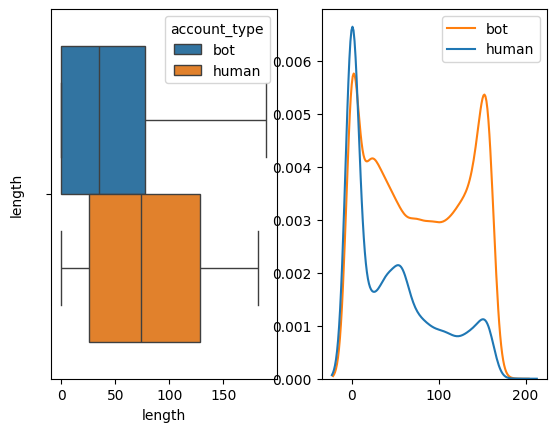

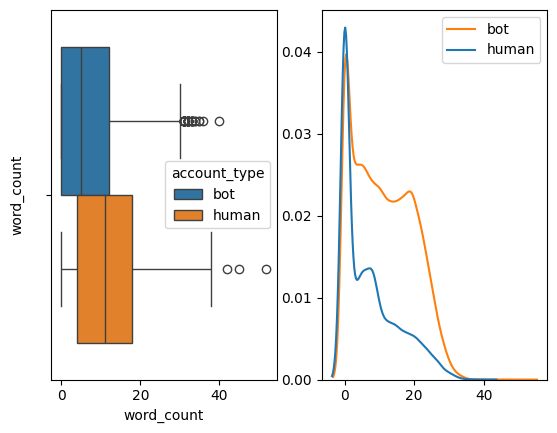

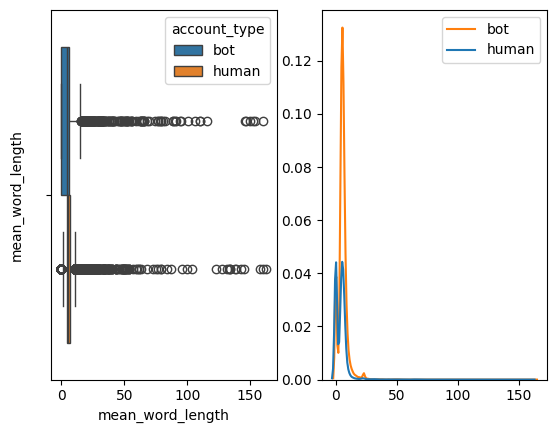

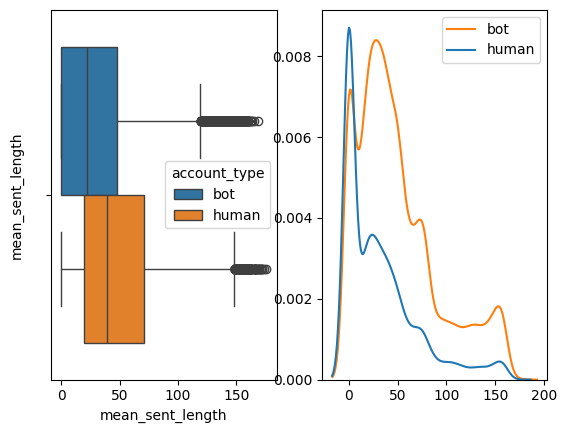

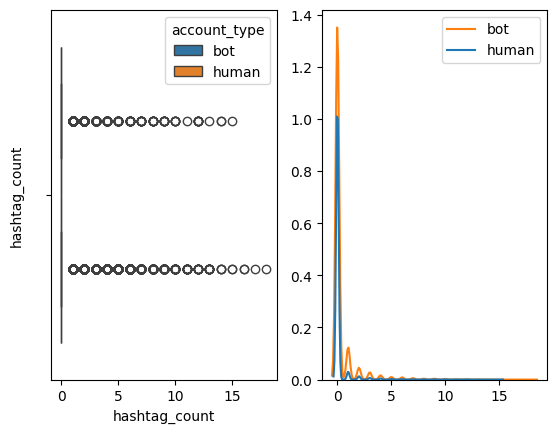

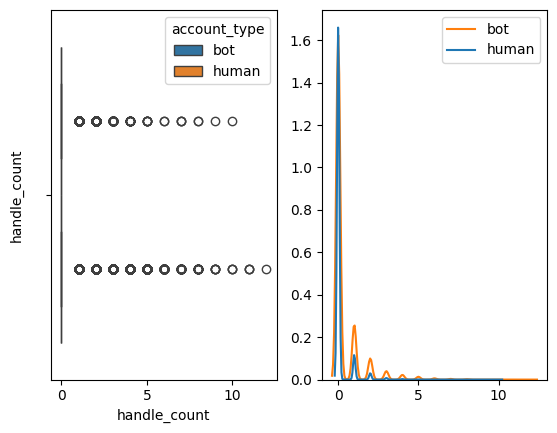

In [18]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(data=description_df, x=feature, hue='account_type')
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(data=description_df, x=feature, hue='account_type')
    plt.legend(description_df['account_type'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

features = description_df.columns.tolist()[2:]
for feature in features:
    if feature not in ["description_language", "description_en"]:
        visualize(feature)

In [19]:
for review in description_df["description"]:
    print(review)
    print("\n")

Blame @xaiax, Inspired by @MakingInvisible, using cmu phonetic data to produce incongruous matches.
Some images via Lorem Flickr.


Photographing the American West since 1980. I specialize in location portraits & events, both indoors & outside, using natural light & portable studio lighting.


Scruffy looking nerf herder and @twitch broadcaster

Contact 📬 svgegent@gmail.com


Wife.Godmother.Friend.Feline Fanatic! Assistant Principal, Vestavia Hills Elementary Liberty Park


Loan coach at @mancity & Aspiring DJ


لا إله إلا الله . فعل التنبيهات 🌷🎖عادل ...حسابي الآخر @__o0h


Co-Host of @TheTalkCBS, Judge on @DancingABC, Founder https://t.co/qYbW5GlP0C, Dancer, Choreographer, Animal rescuer/lover. Instagram: @CarrieAnnInaba


Internationally-acclaimed Egyptian Singer.


nan


Man Utd fan. mostly here for football. Takes photos. Ex care worker, does stuff with computers often sarcastic. 🐝🇬🇧🇪🇺


Stay hungry, Stay foolish.


micropoetry bot ¶ license: https://t.co/vuvanDSlgC ¶ also on masto

### Frequency of N-grams

- some `description` are in other languages, use langdetect / fasttext
- identify more common languages, and translate those `description` into english (using HF Helsinki-NLP/opus-mt-xx-en)
- custom preprocessor: convert emojis to word, lowercase, remove stopwords, lemmatize wherever possible

#### Detection of language used in `description`

In [20]:
import fasttext
from huggingface_hub import hf_hub_download
import os
import re

/Users/han-ying/Downloads/DSA4263 - twitter/twitter_bots_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
def clean_text(text):
    """Remove emoji and links from text to make prediction faster"""
    if not isinstance(text, str):
        return ""
    
    # Emoji & link cleaner
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F1E0-\U0001F1FF"
            "]+", flags=re.UNICODE)
    
    text = re.sub(r"http\S+|www\S+|@\S+", "", text)
    text = emoji_pattern.sub(r"", text)
    text = text.replace("\n", " ").replace("\r", " ")
    text = re.sub(r"\s+", " ", text)
    return text.strip()

def detect_language(df, output_path="twitter_with_lang.csv"):
    """Predict language used in `description` using FastText model."""

    if os.path.exists(output_path):
        twitter_df = pd.read_csv(output_path)
        print(f"Found existing file at {output_path}")
        return twitter_df
    
    else:
        # load fastText model
        model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
        model = fasttext.load_model(model_path)
        
        def detect_language(text):
            text = clean_text(text)
            if not text:
                return "unknown"
            label, prob = model.predict(text)
            return label[0].replace("__label__", "")
        
        df["description_language"] = df["description"].apply(detect_language)
        
        # Save the new dataframe so you can reuse it next time
        df.to_csv(output_path, index=False)

        return df

In [22]:
description_df = detect_language(description_df)

Found existing file at twitter_with_lang.csv


In [23]:
description_df["description_language"].value_counts().head(10)

description_language
eng_Latn    20275
unknown      7600
yue_Hant     1508
kor_Hang     1377
spa_Latn     1192
por_Latn      692
arb_Arab      611
deu_Latn      575
ita_Latn      529
vie_Latn      312
Name: count, dtype: int64

In [24]:
for row, val in pd.DataFrame(description_df["description_language"].value_counts(normalize=True)).iterrows():
    print(row)
    print(val)

eng_Latn
proportion    0.541562
Name: eng_Latn, dtype: float64
unknown
proportion    0.203002
Name: unknown, dtype: float64
yue_Hant
proportion    0.04028
Name: yue_Hant, dtype: float64
kor_Hang
proportion    0.036781
Name: kor_Hang, dtype: float64
spa_Latn
proportion    0.031839
Name: spa_Latn, dtype: float64
por_Latn
proportion    0.018484
Name: por_Latn, dtype: float64
arb_Arab
proportion    0.01632
Name: arb_Arab, dtype: float64
deu_Latn
proportion    0.015359
Name: deu_Latn, dtype: float64
ita_Latn
proportion    0.01413
Name: ita_Latn, dtype: float64
vie_Latn
proportion    0.008334
Name: vie_Latn, dtype: float64
fra_Latn
proportion    0.006758
Name: fra_Latn, dtype: float64
rus_Cyrl
proportion    0.006651
Name: rus_Cyrl, dtype: float64
jpn_Jpan
proportion    0.006491
Name: jpn_Jpan, dtype: float64
tur_Latn
proportion    0.006063
Name: tur_Latn, dtype: float64
bod_Tibt
proportion    0.004594
Name: bod_Tibt, dtype: float64
ind_Latn
proportion    0.003419
Name: ind_Latn, dtype: float

In [25]:
lang_counts = pd.crosstab(description_df['description_language'], description_df['account_type'])
lang_counts["bot_human_ratio"] = lang_counts["bot"] / (lang_counts["human"] + lang_counts["bot"])
lang_counts_sorted = lang_counts.sort_values(by="bot_human_ratio", ascending=False)

In [26]:
lang_counts_sorted

account_type          bot  human  bot_human_ratio
description_language                             
ace_Arab                1      0              1.0
som_Latn                3      0              1.0
lin_Latn                1      0              1.0
mlt_Latn                1      0              1.0
mos_Latn                1      0              1.0
...                   ...    ...              ...
run_Latn                0      1              0.0
san_Deva                0      1              0.0
slv_Latn                0      9              0.0
smo_Latn                0      1              0.0
ewe_Latn                0      1              0.0

[132 rows x 3 columns]

Apart from using profile description language as a feature, we could create a feature that tells us whether or not a language is commonly used as well, as it seems that rare languages have a higher bot to overall ratio

#### Traslate languages that have >= 600 to English
- from previous step, identify commonly used languages
- create a new feature, `description_translated` for commonly used language
- create a binary column `common_language`

In [27]:
to_translate = []
for language, count in pd.DataFrame(description_df["description_language"].value_counts()).itertuples():
    if count >= 600:
        to_translate.append(language)
    else:
        break

In [28]:
to_translate

['eng_Latn',
 'unknown',
 'yue_Hant',
 'kor_Hang',
 'spa_Latn',
 'por_Latn',
 'arb_Arab']

In [ ]:
from transformers import AutoModel, pipeline

translation_model_map = {
    "yue_Hant": pipeline("translation", model="Helsinki-NLP/opus-mt-zh-en"),
    "kor_Hang": pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en"),
    "spa_Latn": pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")
}

/Users/han-ying/Downloads/DSA4263 - twitter/twitter_bots_env/lib/python3.13/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use mps:0
Device set to use mps:0
Device set to use mps:0


In [30]:
def translate_language(df, output_path="twitter_translated.csv", chunk_size=1000):
    
    if os.path.exists(output_path):
        return pd.read_csv(output_path)
    
    else:
        # Initialize new column
        df["description_en"] = ""

        for start in range(0, len(df), chunk_size):
            end = min(start + chunk_size, len(df))
            chunk = df.iloc[start:end]

            for i, row in chunk.iterrows():
                lang = row["description_language"]
                text = row["description"]

                if lang == "eng_Latn":
                    translated = text
                elif lang == "unknown" or lang not in translation_model_map:
                    translated = ""
                else:
                    translator = translation_model_map[lang]
                    translated = translator(text)

                df.at[i, "description_en"] = translated

            # Save intermediate results
            df.iloc[:end].to_csv(output_path, index=False)
            print(f"Saved rows 0 to {end} to {output_path}")

        return df

In [31]:
description_df = translate_language(description_df)

### Most frequently occuring N-Grams

In [32]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def custom_preprocessor(text):
    """
    Remove translated pattern from descriptions that were translated to english.
    Normalize  by replacing handles and URLs with placeholders, lowercase and lemmatize.
    """
    translated_pattern = r"'translation_text': '([^']*)'"
    match = re.search(translated_pattern, text)
    if match:
        text = match[1]

    # replace URLs with placeholder
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    # remove newlines, tabs, and extra spaces
    text = re.sub(r"[\n\t]+", " ", text)
    text = re.sub(r"\s+", " ", text)

    text = text.lower().strip()

    stop_words = set(nltk.corpus.stopwords.words("english"))
    filtered = [word for word in text.split() if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return " ".join(lemmatized)
    

In [33]:
description_en_corpus = description_df["description_en"].fillna("").tolist()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def most_frequent_n_grams(corpus, vectorizer, ngram_range=(1,1)):
    if vectorizer == "CountVectorizer":
        vectorizer = CountVectorizer(preprocessor=custom_preprocessor, ngram_range=ngram_range)
    elif vectorizer == "TfidfVectorizer":
        vectorizer = TfidfVectorizer(preprocessor=custom_preprocessor, ngram_range=ngram_range)
    
    X = vectorizer.fit_transform(corpus)
    count_values = X.toarray().sum(axis=0)
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vectorizer.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]

    sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][2:12])
    plt.title(f'Top 10 Most Frequently Occuring {ngram_range[0]}-grams')
    plt.show()
    return ngram_freq

#### Most Frequently Occuring Words

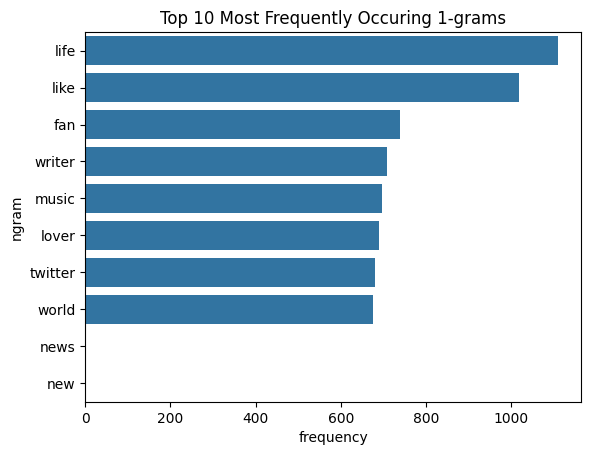

frequency            ngram
0           1476             love
1           1348               im
2           1109             life
3           1019             like
4            739              fan
...          ...              ...
47183          1             aaja
47184          1            aahpm
47185          1  aabrahamwkyccom
47186          1             aaak
47187          1      aaaarreitun

[47188 rows x 2 columns]

In [35]:
most_frequent_n_grams(description_en_corpus, "CountVectorizer")

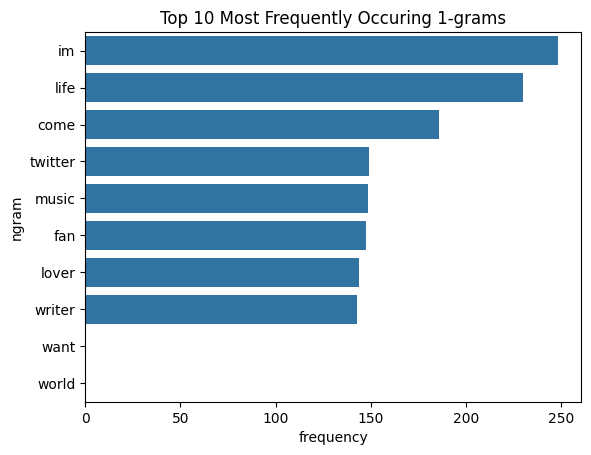

frequency              ngram
0      292.784898               love
1      257.354128               like
2      248.133180                 im
3      230.107113               life
4      185.615165               come
...           ...                ...
47183    0.037513                btv
47184    0.026664  blackensteestemmy
47185    0.017861          realglife
47186    0.013271                nhk
47187    0.012484             batela

[47188 rows x 2 columns]

In [36]:
most_frequent_n_grams(description_en_corpus, "TfidfVectorizer")

#### Most Frequently Occurring Bigrams

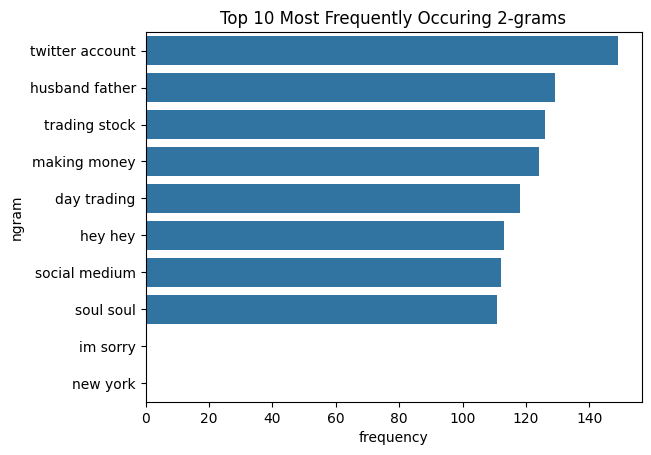

frequency             ngram
0             375         blah blah
1             279  official twitter
2             149   twitter account
3             129    husband father
4             126     trading stock
...           ...               ...
154082          1       aaa english
154083          1        aa manager
154084          1            aa man
154085          1        aa magicfm
154086          1         aa harper

[154087 rows x 2 columns]

In [37]:
most_frequent_n_grams(description_en_corpus, "CountVectorizer", (2,2))

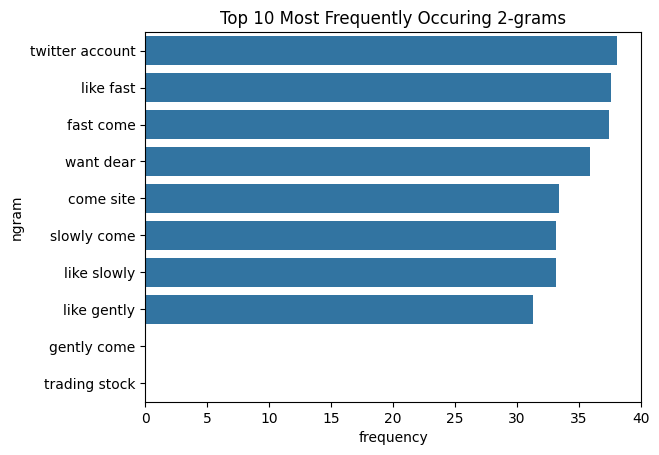

frequency             ngram
0       63.250593  official twitter
1       49.874404         like site
2       38.109217   twitter account
3       37.599013         like fast
4       37.449587         fast come
...           ...               ...
154082   0.012094   batela sjsharks
154083   0.008972        soul heart
154084   0.008972     second second
154085   0.008972      second heart
154086   0.008972        nhk second

[154087 rows x 2 columns]

In [38]:
most_frequent_n_grams(description_en_corpus, "TfidfVectorizer", (2,2))

#### Words, bi-grams and tri-grams separated by human and bot accounts

In [39]:
humans = description_df[description_df['account_type'] == 'human']
bots = description_df[description_df['account_type'] == 'bot']

human_description_corpus = humans["description_en"].dropna().tolist()
bot_description_corpus = bots["description_en"].dropna().tolist()

def normalize(ngram_freq_df):
    total = ngram_freq_df["frequency"].sum()
    ngram_freq_df["normalized_counts"] = ngram_freq_df["frequency"] / total
    return ngram_freq_df

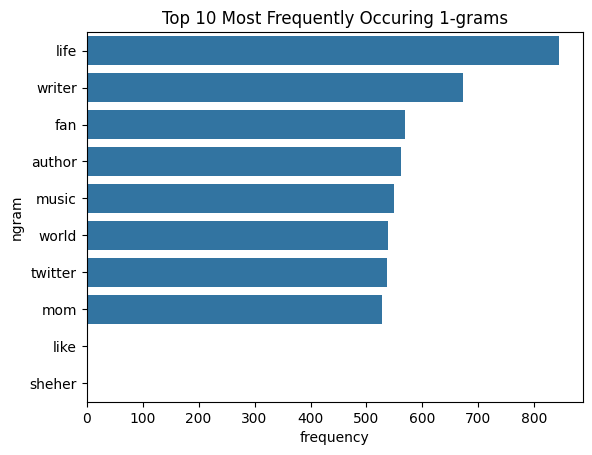

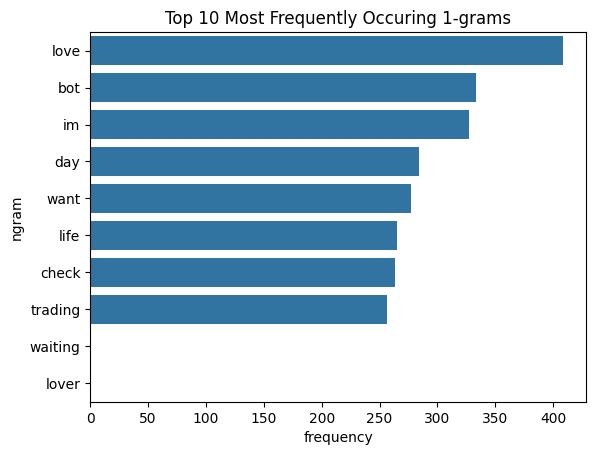

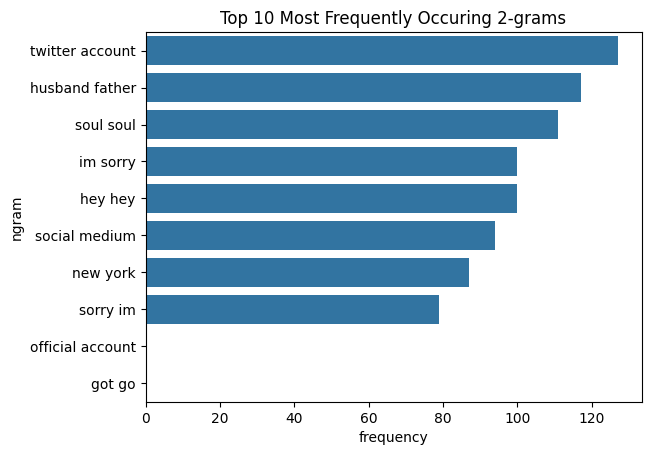

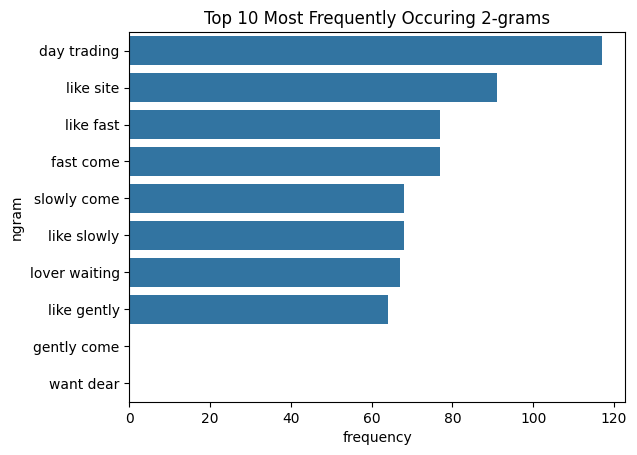

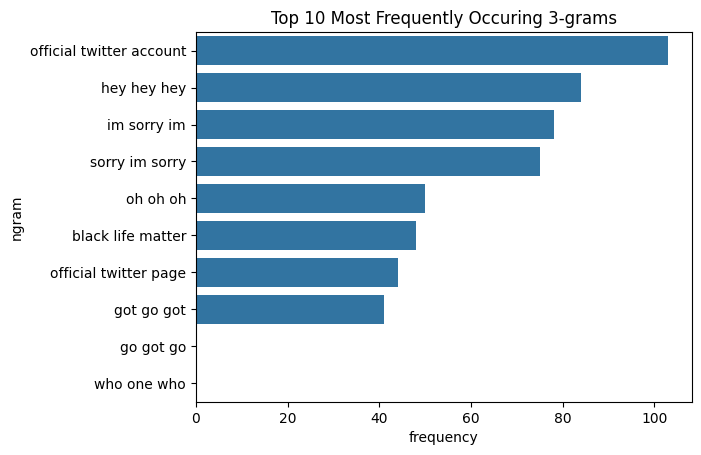

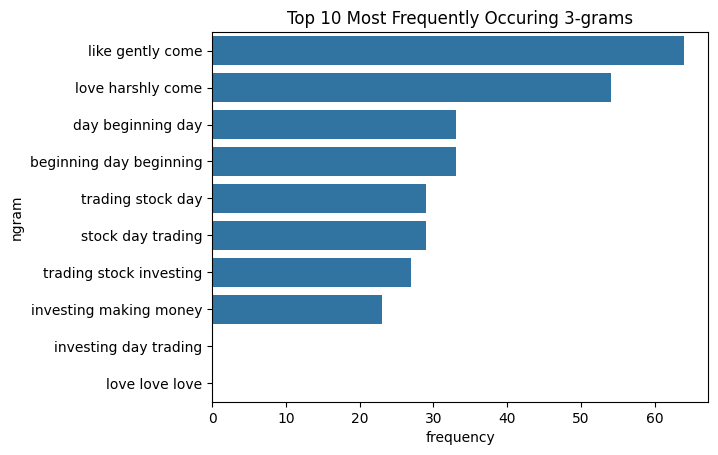

In [40]:
human_word_freq = normalize(most_frequent_n_grams(human_description_corpus, "CountVectorizer", (1,1)))
bot_word_freq = normalize(most_frequent_n_grams(bot_description_corpus, "CountVectorizer", (1,1)))

human_bigram_freq = normalize(most_frequent_n_grams(human_description_corpus, "CountVectorizer", (2,2)))
bot_bigram_freq = normalize(most_frequent_n_grams(bot_description_corpus, "CountVectorizer", (2,2)))

human_trigram_freq = normalize(most_frequent_n_grams(human_description_corpus, "CountVectorizer", (3,3)))
bot_trigram_freq = normalize(most_frequent_n_grams(bot_description_corpus, "CountVectorizer", (3,3)))

In [41]:
human_word_freq

frequency            ngram  normalized_counts
0           1068             love           0.006506
1           1021               im           0.006220
2            844             life           0.005142
3            673           writer           0.004100
4            568              fan           0.003460
...          ...              ...                ...
39877          1             aaja           0.000006
39878          1            aahpm           0.000006
39879          1  aabrahamwkyccom           0.000006
39880          1             aaak           0.000006
39881          1      aaaarreitun           0.000006

[39882 rows x 3 columns]

In [42]:
bot_word_freq

frequency         ngram  normalized_counts
0            523          like           0.011546
1            450          come           0.009934
2            408          love           0.009007
3            333           bot           0.007351
4            327            im           0.007219
...          ...           ...                ...
13538          1       abelian           0.000022
13539          1    abdominous           0.000022
13540          1         abbey           0.000022
13541          1           aat           0.000022
13542          1  aaronfromddw           0.000022

[13543 rows x 3 columns]

In [43]:
human_bigram_freq

frequency             ngram  normalized_counts
0             375         blah blah           0.002565
1             247  official twitter           0.001689
2             127   twitter account           0.000869
3             117    husband father           0.000800
4             111         soul soul           0.000759
...           ...               ...                ...
124793          1       aaa english           0.000007
124794          1        aa manager           0.000007
124795          1            aa man           0.000007
124796          1        aa magicfm           0.000007
124797          1         aa harper           0.000007

[124798 rows x 3 columns]

In [44]:
bot_bigram_freq

frequency                 ngram  normalized_counts
0            126         trading stock           0.003218
1            122          making money           0.003116
2            117           day trading           0.002988
3             91             like site           0.002324
4             77             like fast           0.001967
...          ...                   ...                ...
32890          1          abc cardinal           0.000026
32891          1             abc cable           0.000026
32892          1            abbey four           0.000026
32893          1               aat hnd           0.000026
32894          1  aaronfromddw youtube           0.000026

[32895 rows x 3 columns]

In [45]:
human_trigram_freq

frequency                     ngram  normalized_counts
0             370            blah blah blah           0.002871
1             109            soul soul soul           0.000846
2             103  official twitter account           0.000799
3              84               hey hey hey           0.000652
4              78               im sorry im           0.000605
...           ...                       ...                ...
125532          1      aaa english japanese           0.000008
125533          1         aa manager author           0.000008
125534          1   aa man httpstcotqknuupz           0.000008
125535          1         aa magicfm athens           0.000008
125536          1           aa harper house           0.000008

[125537 rows x 3 columns]

In [46]:
bot_trigram_freq

frequency                      ngram  normalized_counts
0             77             like fast come           0.002319
1             68           like slowly come           0.002048
2             64           like gently come           0.001927
3             54          love harshly come           0.001626
4             33          day beginning day           0.000994
...          ...                        ...                ...
30872          1      abc cardinal powerful           0.000030
30873          1               abc cable tv           0.000030
30874          1            abbey four time           0.000030
30875          1                aat hnd bsc           0.000030
30876          1  aaronfromddw youtube dope           0.000030

[30877 rows x 3 columns]

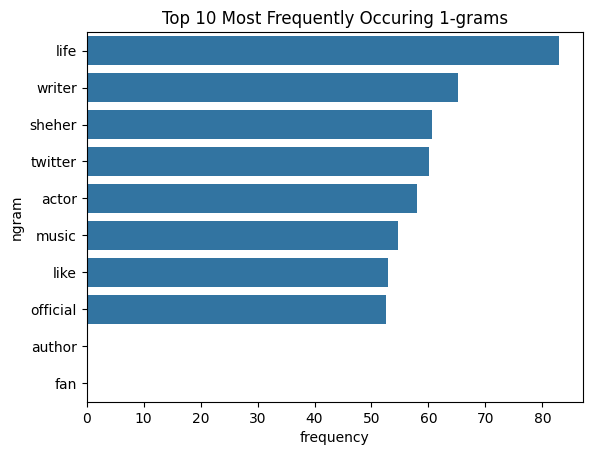

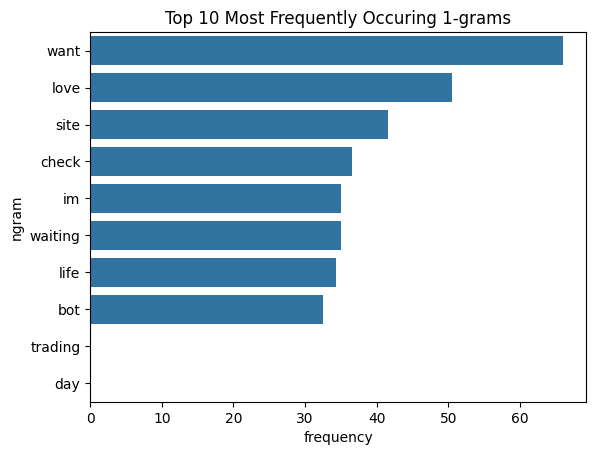

In [47]:
human_gram_freq = normalize(most_frequent_n_grams(human_description_corpus, "TfidfVectorizer", (1,3)))
bot_gram_freq= normalize(most_frequent_n_grams(bot_description_corpus, "TfidfVectorizer", (1,3)))

human_gram_freq.to_csv(os.path.join(os.getcwd(), "human_description_tfidf"))
bot_gram_freq.to_csv(os.path.join(os.getcwd(), "bot_description_tfidf"))

#### Text Clustering of Account Description 
- translate to english
- impute those without description_en with [0,..0]
- 

In [48]:
vectorizer_embedding = TfidfVectorizer(max_features=3000, preprocessor=custom_preprocessor, ngram_range=(1,3))
tfidf_matrix = vectorizer_embedding.fit_transform(description_en_corpus)

### Cluster & Separabilitiy Metrics
- Compute HDBSCAN / KMeans clusters
- Compute purity / normalized mutual information between clusters and bot/human labels
- a high normalized mutual information means strong structure separating groups

account_type   bot  human
cluster                  
-1             603   1494
 0              34     70
 1               9     19
 2               8     30
 3            1999   7166
account_type  bot  human  total  bot_ratio
cluster                                   
31             91      0     91   1.000000
25             54      0     54   1.000000
43             64      0     64   1.000000
45             24      0     24   1.000000
46             20      0     20   1.000000
...           ...    ...    ...        ...
24              2     25     27   0.074074
59              1     19     20   0.050000
55              1     25     26   0.038462
64              1     26     27   0.037037
50              0     39     39   0.000000

[66 rows x 4 columns]


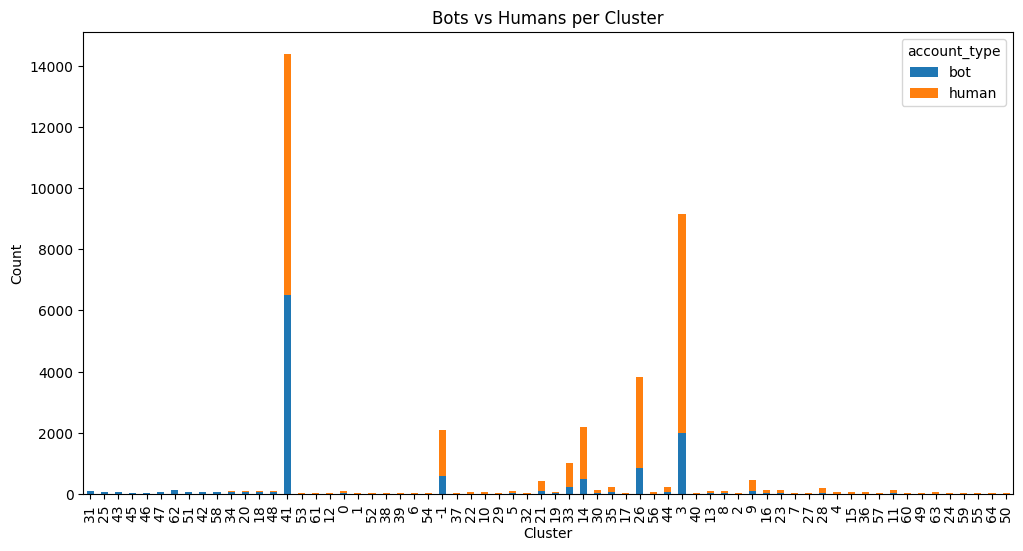

In [51]:
from sklearn.cluster import HDBSCAN

hdb = HDBSCAN(min_cluster_size=20, metric="euclidean")
description_df["cluster"] = hdb.fit_predict(tfidf_matrix)

# 1. Basic cross-tab of counts per cluster × account type
cluster_summary = pd.crosstab(description_df['cluster'],description_df['account_type'])
print(cluster_summary.head())

# 2. Add total accounts per cluster
cluster_summary['total'] = cluster_summary.sum(axis=1)

# 3. Add proportion of bots per cluster (for intuition)
if 'bot' in cluster_summary.columns:
    cluster_summary['bot_ratio'] = cluster_summary['bot'] / cluster_summary['total']
else:
    cluster_summary['bot_ratio'] = 0  # if some clusters have no bots

# 4. Sort by bot ratio (descending)
cluster_summary = cluster_summary.sort_values('bot_ratio', ascending=False)

print(cluster_summary)

cluster_summary[['bot', 'human']].plot(
    kind='bar', stacked=True, figsize=(12, 6), title='Bots vs Humans per Cluster'
)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()




In [52]:
description_df


description account_type  length  \
0      Blame @xaiax, Inspired by @MakingInvisible, us...          bot   129.0   
1      Photographing the American West since 1980. I ...        human   160.0   
2      Scruffy looking nerf herder and @twitch broadc...        human    81.0   
3      Wife.Godmother.Friend.Feline Fanatic! Assistan...        human    97.0   
4                   Loan coach at @mancity & Aspiring DJ        human    36.0   
...                                                  ...          ...     ...   
37433  Role: Stock Taker. Past Roles: Nanny, Sales As...        human   155.0   
37434                    KINGDOM LANDLORD #FreeCornBread        human    31.0   
37435  Bienvenid@s al Twitter Oficial de Sergio Dalma...        human    71.0   
37436  Just a good guy wrapped up in a bad system.\nA...        human    79.0   
37437                                              你好！中国          bot     5.0   

       word_count  mean_word_length  mean_sent_length description_language  \
0              18          6.222222              64.0             eng_Latn   
1              24          5.708333              79.5             eng_Latn   
2              10          7.100000              81.0             eng_Latn   
3               9          9.888889              48.0             eng_Latn   
4               7          4.285714              36.0             eng_Latn   
...           ...               ...               ...                  ...   
37433          20          6.800000              38.0             kor_Hang   
37434           3          9.666667              31.0             yue_Hant   
37435           8          8.000000              35.0             spa_Latn   
37436          17          3.705882              39.0             eng_Latn   
37437           1          5.000000               5.0             jpn_Jpan   

                                          description_en  cluster  
0      Blame @xaiax, Inspired by @MakingInvisible, us...       -1  
1      Photographing the American West since 1980. I ...       34  
2      Scruffy looking nerf herder and @twitch broadc...       34  
3      Wife.Godmother.Friend.Feline Fanatic! Assistan...       34  
4                   Loan coach at @mancity & Aspiring DJ       -1  
...                                                  ...      ...  
37433       [{'translation_text': 'Service/Passtimes.'}]       41  
37434  [{'translation_text': 'KINGDOM LANDLORD #FreeC...        3  
37435  [{'translation_text': 'Bienvenid@s al Twitter ...        3  
37436  Just a good guy wrapped up in a bad system.\nA...        3  
37437                                                NaN       41  

[37438 rows x 9 columns]

You can engineer structural, linguistic, and content-based features from profile descriptions.
Many of these are strong signals for bot detection, especially:
URLs, hashtags, mentions
Lists of roles or interests
Language mismatch
Short/empty descriptions
Neutral or highly generic sentiment